In [1]:
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json


input_encoder = Input(shape=(28, 28, 1))
input_decoder = Input(shape=(4, 4, 4))

with open('decoder.json', 'r') as f:
    decoder = model_from_json(f.read())
    decoder.load_weights("decoder.h5")
    
with open('encoder.json', 'r') as f:
    encoder = model_from_json(f.read())
    encoder.load_weights("encoder.h5")
    
with open('autoencoder.json', 'r') as f:
    autoencoder = model_from_json(f.read())
    autoencoder.load_weights("autoencoder.h5")

/home/ganimedes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_train = encoder.predict(x_train)

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 4, 4, 4)
(60000,)


(64, 5923)


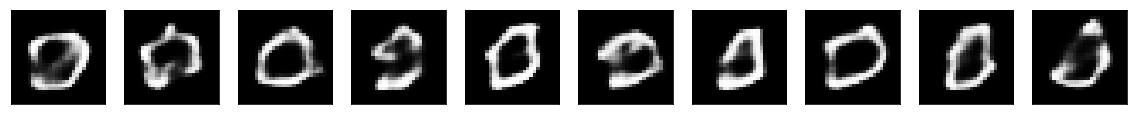

In [49]:
plot = [[] for a in range(64)]
for a, b in zip(x_train, y_train):
    if b == 0:
        a = a.flatten()
        for x in range(64):
            plot[x].append(a[x])
#plot = np.array(plot)
#plot = plot.flatten()
#plt.xlim(0, 4)
#plt.hist(plot, normed=True, bins=20)
#plt.show()

plot = np.array(plot)
print(plot.shape)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = [np.random.choice(plot[a], 1) for a in range(64)]
    img = np.array(img)
    img = decoder.predict(img.reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

(64, 60000)


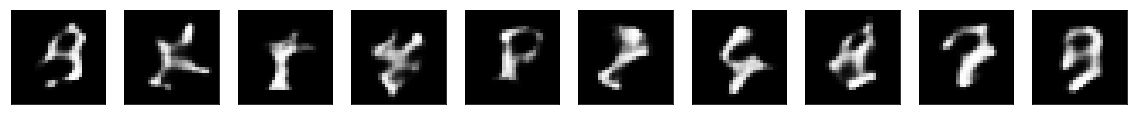

In [50]:
plot = [[] for a in range(64)]
for a, b in zip(x_train, y_train):
    a = a.flatten()
    for x in range(64):
        plot[x].append(a[x])

#plot = np.array(plot[20])
#plot = plot.flatten()
#plt.xlim(0, 4)
#plt.hist(plot, normed=True, bins=20)
#plt.show()

plot = np.array(plot)
print(plot.shape)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = [np.random.choice(plot[a], 1) for a in range(64)]
    img = np.array(img)
    img = decoder.predict(img.reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()


In [51]:
from sklearn import mixture

(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_train = encoder.predict(x_train)

In [52]:
print(x_train.shape)

(60000, 4, 4, 4)


In [53]:
x_train = x_train.reshape(60000, 64)

In [54]:
clf = mixture.GaussianMixture(n_components=10, covariance_type='full')
clf.fit(x_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [79]:
a = clf.sample(20)
sample = np.array(a[0])
print(sample.shape)

(20, 64)


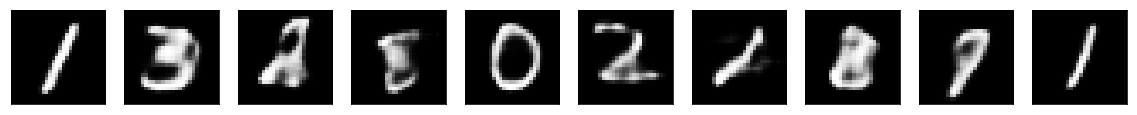

In [77]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(np.array((clf.sample(1))[0]).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

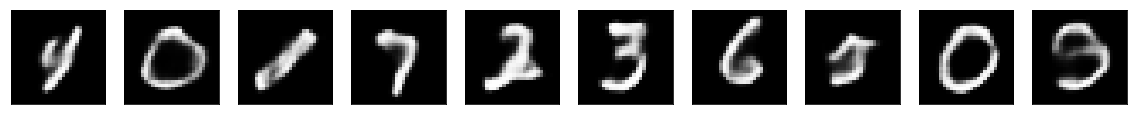

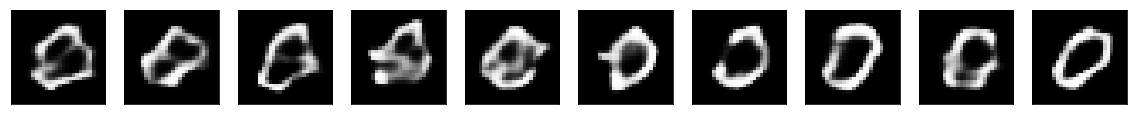

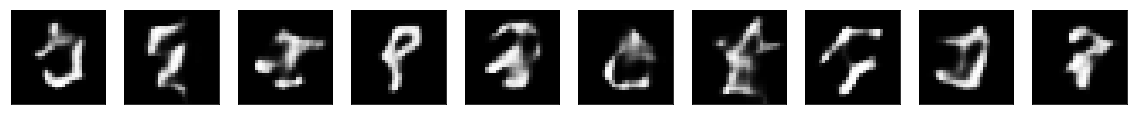

In [96]:
from sklearn import mixture

(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_train = encoder.predict(x_train)

data_gmm = x_train.reshape(x_train.shape[0], -1)
clf = mixture.GaussianMixture(n_components=10, covariance_type='full')
clf.fit(data_gmm)
    

def gmm_generator(samples_count):
    a = clf.sample(samples_count)
    sample = np.array(a[0])
    return sample


def cluster_per_feature_class_generator(samples_count, class_type):
    data = x_train.reshape(x_train.shape[0], -1)
    result = []
    for a, b in zip(data, y_train):
        if b == class_type:
            result.append(a)
    data = np.array(result).T
    result = []
    for a in data:
        result.append(np.random.choice(a, samples_count))
    result = np.array(result)
    result = result.T
    return result
            
def cluster_per_feature_generator(samples_count):
    data = x_train.reshape(x_train.shape[0], -1)
    data = data.T
    result = []
    for a in data:
        result.append(np.random.choice(a, samples_count))
    result = np.array(result)
    result = result.T
    return result


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(gmm_generator(1).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(cluster_per_feature_class_generator(1, 0).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(cluster_per_feature_generator(1).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()